In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
music_Emotion_Data = pd.DataFrame(pd.read_csv("acoustic_Features.csv"))
music_Emotion_Data

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [3]:
music_Emotion_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

## Naive-Bayes Classification 

In [5]:
naive_bayes = music_Emotion_Data
naive_bayes.dropna()
naive_bayes.copy()
y_60_40 = naive_bayes["Class"]
X_60_40 = naive_bayes.drop(["Class"], axis = 1)
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X_60_40, y_60_40, test_size=0.4, random_state=55)

In [6]:
naive_bayes_model_60train_40test = GaussianNB()
naive_bayes_model_60train_40test.fit(X_train_60, y_train_60)
y_pred_60_40 = naive_bayes_model_60train_40test.predict(X_test_40)

NaiveBayesAccuracy_60train_40test = accuracy_score(y_test_40, y_pred_60_40)
NaiveBayesPrecision_60train_40test = precision_score(y_test_40, y_pred_60_40, average="weighted")
NaiveBayesRecall_60train_40test = recall_score(y_test_40, y_pred_60_40, average="weighted")
NaiveBayesF1_60train_40test = f1_score(y_test_40, y_pred_60_40, average="weighted")
NaiveBayesClassificationReport_60train_40test = classification_report(y_test_40, y_pred_60_40)

print("Naive-Bayes accuracy score for %60 train, %40 test: " + str(NaiveBayesAccuracy_60train_40test))
print("Naive-Bayes precision score for %60 train, %40 test: " + str(NaiveBayesPrecision_60train_40test))
print("Naive-Bayes recall score for %60 train, %40 test: " + str(NaiveBayesRecall_60train_40test))
print("Naive-Bayes F1 score for %60 train, %40 test: " + str(NaiveBayesF1_60train_40test))
print("\n\n Naive-Bayes Classification Report for %60 train, %40 test; \n" + str(NaiveBayesClassificationReport_60train_40test))


Naive-Bayes accuracy score for %60 train, %40 test: 0.66875
Naive-Bayes precision score for %60 train, %40 test: 0.6514572152653548
Naive-Bayes recall score for %60 train, %40 test: 0.66875
Naive-Bayes F1 score for %60 train, %40 test: 0.6561479537915357


 Naive-Bayes Classification Report for %60 train, %40 test; 
              precision    recall  f1-score   support

       angry       0.72      0.76      0.74        37
       happy       0.73      0.83      0.78        46
       relax       0.67      0.72      0.70        40
         sad       0.46      0.32      0.38        37

    accuracy                           0.67       160
   macro avg       0.65      0.66      0.65       160
weighted avg       0.65      0.67      0.66       160



In [7]:
y_70_30 = naive_bayes["Class"]
X_70_30 = naive_bayes.drop(["Class"], axis = 1)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_70_30, y_70_30, test_size=0.3, random_state=42)
naive_bayes_model_70train_30test = GaussianNB()
naive_bayes_model_70train_30test.fit(X_train_70, y_train_70)
y_pred_70_30 = naive_bayes_model_70train_30test.predict(X_test_30)

NaiveBayesAccuracy_70train_30test = accuracy_score(y_test_30, y_pred_70_30)
NaiveBayesPrecision_70train_30test = precision_score(y_test_30, y_pred_70_30, average="weighted")
NaiveBayesRecall_70train_30test = recall_score(y_test_30, y_pred_70_30, average="weighted")
NaiveBayesF1_70train_30test = f1_score(y_test_30, y_pred_70_30, average="weighted")
NaiveBayesClassificationReport_70train_30test = classification_report(y_test_30, y_pred_70_30)

print("Naive-Bayes accuracy score for %70 train, %30 test: " + str(NaiveBayesAccuracy_70train_30test))
print("Naive-Bayes precision score for %70 train, %30 test: " + str(NaiveBayesPrecision_70train_30test))
print("Naive-Bayes recall score for %70 train, %30 test: " + str(NaiveBayesRecall_70train_30test))
print("Naive-Bayes F1 score for %70 train, %30 test: " + str(NaiveBayesF1_70train_30test))
print("\n\n Naive-Bayes Classification Report for %70 train, %30 test; \n" + str(NaiveBayesClassificationReport_70train_30test))


Naive-Bayes accuracy score for %70 train, %30 test: 0.625
Naive-Bayes precision score for %70 train, %30 test: 0.623172619047619
Naive-Bayes recall score for %70 train, %30 test: 0.625
Naive-Bayes F1 score for %70 train, %30 test: 0.6110015857657367


 Naive-Bayes Classification Report for %70 train, %30 test; 
              precision    recall  f1-score   support

       angry       0.64      0.57      0.60        28
       happy       0.57      0.92      0.71        25
       relax       0.74      0.70      0.72        37
         sad       0.50      0.33      0.40        30

    accuracy                           0.62       120
   macro avg       0.61      0.63      0.61       120
weighted avg       0.62      0.62      0.61       120



In [8]:
y_80_20 = naive_bayes["Class"]
X_80_20 = naive_bayes.drop(["Class"], axis = 1)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_80_20, y_80_20, test_size=0.2, random_state=35)
naive_bayes_model_80train_20test = GaussianNB()
naive_bayes_model_80train_20test.fit(X_train_80, y_train_80)
y_pred_80_20 = naive_bayes_model_80train_20test.predict(X_test_20)

NaiveBayesAccuracy_80train_20test = accuracy_score(y_test_20, y_pred_80_20)
NaiveBayesPrecision_80train_20test = precision_score(y_test_20, y_pred_80_20, average="weighted")
NaiveBayesRecall_80train_20test = recall_score(y_test_20, y_pred_80_20, average="weighted")
NaiveBayesF1_80train_20test = f1_score(y_test_20, y_pred_80_20, average="weighted")
NaiveBayesClassificationReport_80train_20test = classification_report(y_test_20, y_pred_80_20)

print("Naive-Bayes accuracy score for %80 train, %20 test: " + str(NaiveBayesAccuracy_80train_20test))
print("Naive-Bayes precision score for %80 train, %20 test: " + str(NaiveBayesPrecision_80train_20test))
print("Naive-Bayes recall score for %80 train, %20 test: " + str(NaiveBayesRecall_80train_20test))
print("Naive-Bayes F1 score for %80 train, %20 test: " + str(NaiveBayesF1_80train_20test))
print("\n\n Naive-Bayes Classification Report for %80 train, %20 test; \n" + str(NaiveBayesClassificationReport_80train_20test))


Naive-Bayes accuracy score for %80 train, %20 test: 0.75
Naive-Bayes precision score for %80 train, %20 test: 0.7811607142857143
Naive-Bayes recall score for %80 train, %20 test: 0.75
Naive-Bayes F1 score for %80 train, %20 test: 0.7506627429242206


 Naive-Bayes Classification Report for %80 train, %20 test; 
              precision    recall  f1-score   support

       angry       0.75      0.71      0.73        21
       happy       0.60      0.86      0.71        21
       relax       0.90      0.83      0.86        23
         sad       0.89      0.53      0.67        15

    accuracy                           0.75        80
   macro avg       0.79      0.73      0.74        80
weighted avg       0.78      0.75      0.75        80



In [10]:
# Best results: 80 train, 20 test.

Text(0.5, 1.0, 'Results')

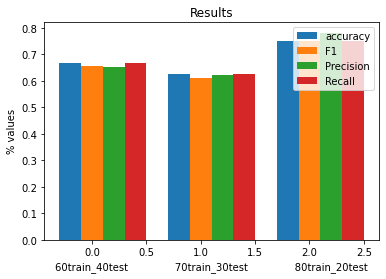

In [18]:
accuracy_List = [NaiveBayesAccuracy_60train_40test, NaiveBayesAccuracy_70train_30test, NaiveBayesAccuracy_80train_20test]
precision_List = [NaiveBayesPrecision_60train_40test, NaiveBayesPrecision_70train_30test, NaiveBayesPrecision_80train_20test]
recall_List = [NaiveBayesRecall_60train_40test, NaiveBayesRecall_70train_30test, NaiveBayesRecall_80train_20test]
f1_List = [NaiveBayesF1_60train_40test, NaiveBayesF1_70train_30test, NaiveBayesF1_80train_20test]
x_index = np.arange(3)
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, accuracy_List, width=en, label = "accuracy")
plt.bar(x_index, f1_List, width=en, label = "F1")
plt.bar(x_index+en, precision_List, width=en, label = "Precision")
plt.bar(x_index+2*en, recall_List, width=en, label = "Recall")

plt.legend()

plt.xlabel("60train_40test               70train_30test               80train_20test")
plt.ylabel("% values")
plt.title("Results")

## Random Forests Classification

In [11]:
random_forests = music_Emotion_Data
random_forests.dropna()
random_forests.copy()
random_forests.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [128]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The nu

### RF / 60 train, 40 test

In [12]:
y_rf_60_40 = random_forests["Class"]
X_rf_60_40 = random_forests.drop(["Class"], axis = 1)
X_rf_train_60, X_rf_test_40, y_rf_train_60, y_rf_test_40 = train_test_split(X_rf_60_40, y_rf_60_40, test_size=0.4, random_state=11)
rf_model_60train_40test = RandomForestClassifier().fit(X_rf_train_60, y_rf_train_60)
y_rf_pred_60_40 = rf_model_60train_40test.predict(X_rf_test_40)

RandomForestsAccuracy_60train_40test = accuracy_score(y_rf_test_40, y_rf_pred_60_40)
RandomForestsPrecision_60train_40test = precision_score(y_rf_test_40, y_rf_pred_60_40, average="weighted")
RandomForestsRecall_60train_40test = recall_score(y_rf_test_40, y_rf_pred_60_40, average="weighted")
RandomForestsF1_60train_40test = f1_score(y_rf_test_40, y_rf_pred_60_40, average="weighted")
RandomForestsReport_60train_40test = classification_report(y_rf_test_40, y_rf_pred_60_40)

print("Random Forests accuracy score for %60 train, %40 test: " + str(RandomForestsAccuracy_60train_40test))
print("Random Forests precision score for %60 train, %40 test: " + str(RandomForestsPrecision_60train_40test))
print("Random Forests recall score for %60 train, %40 test: " + str(RandomForestsRecall_60train_40test))
print("Random Forests F1 score for %60 train, %40 test: " + str(RandomForestsF1_60train_40test))
print("\n\n Random Forests Report for %60 train, %40 test; \n" + str(RandomForestsReport_60train_40test))

Random Forests accuracy score for %60 train, %40 test: 0.825
Random Forests precision score for %60 train, %40 test: 0.8230466722885315
Random Forests recall score for %60 train, %40 test: 0.825
Random Forests F1 score for %60 train, %40 test: 0.8233426975828776


 Random Forests Report for %60 train, %40 test; 
              precision    recall  f1-score   support

       angry       0.93      0.90      0.92        42
       happy       0.87      0.95      0.91        43
       relax       0.78      0.74      0.76        38
         sad       0.69      0.68      0.68        37

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



### RF / 60 train, 40 test Model Tuning

In [13]:
# Random Forests model tuning for 60test, 40train;
rf_params = {"n_estimators": [200, 500, 1000, 2000], 
             "max_depth": [2,3,5,10], 
             "max_features": [5,10,20,40,50], 
             "min_samples_split": [2,5,10]}

rf_model_60train_40test_cv = GridSearchCV(rf_model_60train_40test, rf_params, cv = 10, n_jobs=-1).fit(X_rf_train_60, y_rf_train_60)
        

 

In [14]:
print("Best parameters after model tuning: " + str(rf_model_60train_40test_cv.best_params_))

Best parameters after model tuning: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
rf_model_60train_40test_tuned = RandomForestClassifier(max_depth= rf_model_60train_40test_cv.best_params_["max_depth"],
                                                       max_features= rf_model_60train_40test_cv.best_params_["max_features"],
                                                       min_samples_split=rf_model_60train_40test_cv.best_params_["min_samples_split"],
                                                       n_estimators=rf_model_60train_40test_cv.best_params_["n_estimators"])

rf_model_60train_40test_tuned.fit(X_rf_train_60, y_rf_train_60)
y_rf_pred_60_40_tuned = rf_model_60train_40test_tuned.predict(X_rf_test_40)

RandomForestsAccuracy_60train_40test_tuned = accuracy_score(y_rf_test_40, y_rf_pred_60_40_tuned)
RandomForestsPrecision_60train_40test_tuned = precision_score(y_rf_test_40, y_rf_pred_60_40_tuned, average="weighted")
RandomForestsRecall_60train_40test_tuned = recall_score(y_rf_test_40, y_rf_pred_60_40_tuned, average="weighted")
RandomForestsF1_60train_40test_tuned = f1_score(y_rf_test_40, y_rf_pred_60_40_tuned, average="weighted")
RandomForestsReport_60train_40test_tuned = classification_report(y_rf_test_40, y_rf_pred_60_40_tuned)

print("Random Forests TUNED accuracy score for %60 train, %40 test: " + str(RandomForestsAccuracy_60train_40test_tuned))
print("Random Forests TUNED precision score for %60 train, %40 test: " + str(RandomForestsPrecision_60train_40test_tuned))
print("Random Forests TUNED recall score for %60 train, %40 test: " + str(RandomForestsRecall_60train_40test_tuned))
print("Random Forests TUNED F1 score for %60 train, %40 test: " + str(RandomForestsF1_60train_40test_tuned))
print("\n\n Random Forests TUNED Report for %60 train, %40 test; \n" + str(RandomForestsReport_60train_40test_tuned))

Random Forests TUNED accuracy score for %60 train, %40 test: 0.825
Random Forests TUNED precision score for %60 train, %40 test: 0.8228607100889711
Random Forests TUNED recall score for %60 train, %40 test: 0.825
Random Forests TUNED F1 score for %60 train, %40 test: 0.8234966448189762


 Random Forests TUNED Report for %60 train, %40 test; 
              precision    recall  f1-score   support

       angry       0.86      0.86      0.86        42
       happy       0.87      0.93      0.90        43
       relax       0.84      0.82      0.83        38
         sad       0.71      0.68      0.69        37

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



### RF / 70 train, 30 test 

In [16]:
y_rf_70_30 = random_forests["Class"]
X_rf_70_30 = random_forests.drop(["Class"], axis = 1)
X_rf_train_70, X_rf_test_30, y_rf_train_70, y_rf_test_30 = train_test_split(X_rf_70_30, y_rf_70_30, test_size=0.3, random_state=12)
rf_model_70train_30test = RandomForestClassifier().fit(X_rf_train_70, y_rf_train_70)
y_rf_pred_70_30 = rf_model_70train_30test.predict(X_rf_test_30)

RandomForestsAccuracy_70train_30test = accuracy_score(y_rf_test_30, y_rf_pred_70_30)
RandomForestsPrecision_70train_30test = precision_score(y_rf_test_30, y_rf_pred_70_30, average="weighted")
RandomForestsRecall_70train_30test = recall_score(y_rf_test_30, y_rf_pred_70_30, average="weighted")
RandomForestsF1_70train_30test = f1_score(y_rf_test_30, y_rf_pred_70_30, average="weighted")
RandomForestsReport_70train_30test = classification_report(y_rf_test_30, y_rf_pred_70_30)

print("Random Forests accuracy score for %70 train, %30 test: " + str(RandomForestsAccuracy_70train_30test))
print("Random Forests precision score for %70 train, %30 test: " + str(RandomForestsPrecision_70train_30test))
print("Random Forests recall score for %70 train, %30 test: " + str(RandomForestsRecall_70train_30test))
print("Random Forests F1 score for %70 train, %30 test: " + str(RandomForestsF1_70train_30test))
print("\n\n Random Forests Report for %70 train, %30 test; \n" + str(RandomForestsReport_70train_30test))

Random Forests accuracy score for %70 train, %30 test: 0.825
Random Forests precision score for %70 train, %30 test: 0.8324108015640274
Random Forests recall score for %70 train, %30 test: 0.825
Random Forests F1 score for %70 train, %30 test: 0.8254686424273868


 Random Forests Report for %70 train, %30 test; 
              precision    recall  f1-score   support

       angry       0.96      0.82      0.89        33
       happy       0.86      0.96      0.91        25
       relax       0.73      0.83      0.77        29
         sad       0.77      0.73      0.75        33

    accuracy                           0.82       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.82      0.83       120



### RF / 70 train, 30 test Model Tuning

In [17]:
# Random Forests model tuning for 70test, 30train;
rf_model_70train_30test_cv = GridSearchCV(rf_model_70train_30test, rf_params, cv = 10, n_jobs=-1).fit(X_rf_train_70, y_rf_train_70)

In [19]:
print("Best parameters after model tuning: " + str(rf_model_70train_30test_cv.best_params_))

Best parameters after model tuning: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 10, 'n_estimators': 500}


In [20]:
rf_model_70train_30test_tuned = RandomForestClassifier(max_depth= rf_model_70train_30test_cv.best_params_["max_depth"],
                                                       max_features= rf_model_70train_30test_cv.best_params_["max_features"],
                                                       min_samples_split=rf_model_70train_30test_cv.best_params_["min_samples_split"],
                                                       n_estimators=rf_model_70train_30test_cv.best_params_["n_estimators"])

rf_model_70train_30test_tuned.fit(X_rf_train_70, y_rf_train_70)
y_rf_pred_70_30_tuned = rf_model_70train_30test_tuned.predict(X_rf_test_30)

RandomForestsAccuracy_70train_30test_tuned = accuracy_score(y_rf_test_30, y_rf_pred_70_30_tuned)
RandomForestsPrecision_70train_30test_tuned = precision_score(y_rf_test_30, y_rf_pred_70_30_tuned, average="weighted")
RandomForestsRecall_70train_30test_tuned = recall_score(y_rf_test_30, y_rf_pred_70_30_tuned, average="weighted")
RandomForestsF1_70train_30test_tuned = f1_score(y_rf_test_30, y_rf_pred_70_30_tuned, average="weighted")
RandomForestsReport_70train_30test_tuned = classification_report(y_rf_test_30, y_rf_pred_70_30_tuned)

print("Random Forests TUNED accuracy score for %70 train, %30 test: " + str(RandomForestsAccuracy_70train_30test_tuned))
print("Random Forests TUNED precision score for %70 train, %30 test: " + str(RandomForestsPrecision_70train_30test_tuned))
print("Random Forests TUNED recall score for %70 train, %30 test: " + str(RandomForestsRecall_70train_30test_tuned))
print("Random Forests TUNED F1 score for %70 train, %30 test: " + str(RandomForestsF1_70train_30test_tuned))
print("\n\n Random Forests TUNED Report for %70 train, %30 test; \n" + str(RandomForestsReport_70train_30test_tuned))

Random Forests TUNED accuracy score for %70 train, %30 test: 0.8583333333333333
Random Forests TUNED precision score for %70 train, %30 test: 0.8650520661455325
Random Forests TUNED recall score for %70 train, %30 test: 0.8583333333333333
Random Forests TUNED F1 score for %70 train, %30 test: 0.8597940832315831


 Random Forests TUNED Report for %70 train, %30 test; 
              precision    recall  f1-score   support

       angry       0.97      0.91      0.94        33
       happy       0.96      0.88      0.92        25
       relax       0.76      0.90      0.83        29
         sad       0.78      0.76      0.77        33

    accuracy                           0.86       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.86      0.86       120



### RF / 80 train, 20 test

In [21]:
y_rf_80_20 = random_forests["Class"]
X_rf_80_20 = random_forests.drop(["Class"], axis = 1)
X_rf_train_80, X_rf_test_20, y_rf_train_80, y_rf_test_20 = train_test_split(X_rf_80_20, y_rf_80_20, test_size=0.2, random_state=13)
rf_model_80train_20test = RandomForestClassifier().fit(X_rf_train_80, y_rf_train_80)
y_rf_pred_80_20 = rf_model_80train_20test.predict(X_rf_test_20)

RandomForestsAccuracy_80train_20test = accuracy_score(y_rf_test_20, y_rf_pred_80_20)
RandomForestsPrecision_80train_20test = precision_score(y_rf_test_20, y_rf_pred_80_20, average="weighted")
RandomForestsRecall_80train_20test = recall_score(y_rf_test_20, y_rf_pred_80_20, average="weighted")
RandomForestsF1_80train_20test = f1_score(y_rf_test_20, y_rf_pred_80_20, average="weighted")
RandomForestsReport_80train_20test = classification_report(y_rf_test_20, y_rf_pred_80_20)

print("Random Forests accuracy score for %80 train, %20 test: " + str(RandomForestsAccuracy_80train_20test))
print("Random Forests precision score for %80 train, %20 test: " + str(RandomForestsPrecision_80train_20test))
print("Random Forests recall score for %80 train, %20 test: " + str(RandomForestsRecall_80train_20test))
print("Random Forests F1 score for %80 train, %20 test: " + str(RandomForestsF1_80train_20test))
print("\n\n Random Forests Report for %80 train, %20 test; \n" + str(RandomForestsReport_80train_20test))

Random Forests accuracy score for %80 train, %20 test: 0.8125
Random Forests precision score for %80 train, %20 test: 0.8088156408808583
Random Forests recall score for %80 train, %20 test: 0.8125
Random Forests F1 score for %80 train, %20 test: 0.8029939509810065


 Random Forests Report for %80 train, %20 test; 
              precision    recall  f1-score   support

       angry       0.94      0.94      0.94        18
       happy       0.86      0.96      0.91        25
       relax       0.70      0.80      0.74        20
         sad       0.73      0.47      0.57        17

    accuracy                           0.81        80
   macro avg       0.81      0.79      0.79        80
weighted avg       0.81      0.81      0.80        80



### RF / 80 train, 20 test Model Tuning

In [22]:
rf_model_80train_20test_cv = GridSearchCV(rf_model_80train_20test, rf_params, cv = 10, n_jobs=-1).fit(X_rf_train_80, y_rf_train_80)

In [23]:
print("Best parameters after model tuning: " + str(rf_model_80train_20test_cv.best_params_))

Best parameters after model tuning: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [24]:
rf_model_80train_20test_tuned = RandomForestClassifier(max_depth= rf_model_80train_20test_cv.best_params_["max_depth"],
                                                       max_features= rf_model_80train_20test_cv.best_params_["max_features"],
                                                       min_samples_split=rf_model_80train_20test_cv.best_params_["min_samples_split"],
                                                       n_estimators=rf_model_80train_20test_cv.best_params_["n_estimators"])

rf_model_80train_20test_tuned.fit(X_rf_train_80, y_rf_train_80)
y_rf_pred_80_20_tuned = rf_model_80train_20test_tuned.predict(X_rf_test_20)

RandomForestsAccuracy_80train_20test_tuned = accuracy_score(y_rf_test_20, y_rf_pred_80_20_tuned)
RandomForestsPrecision_80train_20test_tuned = precision_score(y_rf_test_20, y_rf_pred_80_20_tuned, average="weighted")
RandomForestsRecall_80train_20test_tuned = recall_score(y_rf_test_20, y_rf_pred_80_20_tuned, average="weighted")
RandomForestsF1_80train_20test_tuned = f1_score(y_rf_test_20, y_rf_pred_80_20_tuned, average="weighted")
RandomForestsReport_80train_20test_tuned = classification_report(y_rf_test_20, y_rf_pred_80_20_tuned)

print("Random Forests TUNED accuracy score for %80 train, %20 test: " + str(RandomForestsAccuracy_80train_20test_tuned))
print("Random Forests TUNED precision score for %80 train, %20 test: " + str(RandomForestsPrecision_80train_20test_tuned))
print("Random Forests TUNED recall score for %80 train, %20 test: " + str(RandomForestsRecall_80train_20test_tuned))
print("Random Forests TUNED F1 score for %80 train, %20 test: " + str(RandomForestsF1_80train_20test_tuned))
print("\n\n Random Forests TUNED Report for %80 train, %20 test; \n" + str(RandomForestsReport_80train_20test_tuned))

Random Forests TUNED accuracy score for %80 train, %20 test: 0.8375
Random Forests TUNED precision score for %80 train, %20 test: 0.8349074766766413
Random Forests TUNED recall score for %80 train, %20 test: 0.8375
Random Forests TUNED F1 score for %80 train, %20 test: 0.8309796293297873


 Random Forests TUNED Report for %80 train, %20 test; 
              precision    recall  f1-score   support

       angry       0.95      1.00      0.97        18
       happy       0.92      0.96      0.94        25
       relax       0.70      0.80      0.74        20
         sad       0.75      0.53      0.62        17

    accuracy                           0.84        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.84      0.83        80



Text(0.5, 1.0, 'Results')

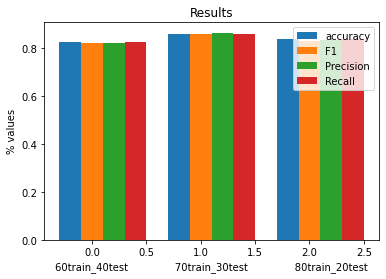

In [41]:
accuracy_List_rf = [RandomForestsAccuracy_60train_40test_tuned, RandomForestsAccuracy_70train_30test_tuned, RandomForestsAccuracy_80train_20test_tuned]
precision_List_rf = [RandomForestsPrecision_60train_40test_tuned, RandomForestsPrecision_70train_30test_tuned, RandomForestsPrecision_80train_20test_tuned]
recall_List_rf = [RandomForestsRecall_60train_40test_tuned, RandomForestsRecall_70train_30test_tuned, RandomForestsRecall_80train_20test_tuned]
f1_List_rf = [RandomForestsF1_60train_40test_tuned, RandomForestsF1_70train_30test_tuned, RandomForestsF1_80train_20test_tuned]

x_index = np.arange(3)
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, accuracy_List_rf, width=en, label = "accuracy")
plt.bar(x_index, f1_List_rf, width=en, label = "F1")
plt.bar(x_index+en, precision_List_rf, width=en, label = "Precision")
plt.bar(x_index+2*en, recall_List_rf, width=en, label = "Recall")

plt.legend()

plt.xlabel("60train_40test               70train_30test               80train_20test")
plt.ylabel("% values")
plt.title("Results")

### Best result for Random Forests is 70 train and 30 test.

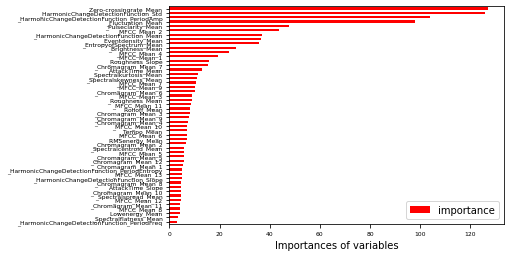

In [26]:
importance = pd.DataFrame({"importance": rf_model_70train_30test_tuned.feature_importances_*1000}, index = X_rf_train_70.columns)
importance.sort_values(by = "importance", axis = 0, ascending= True).plot(kind = "barh", color = "red", fontsize=6, )

import matplotlib.pyplot as plt 
plt.xlabel("Importances of variables");

## RF / KFold

In [7]:
X_kfold = music_Emotion_Data.drop(["Class"], axis = 1)
y_kfold = music_Emotion_Data["Class"]

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

In [8]:
for train_index, test_index in kf.split(X_kfold):
    X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_kfold[train_index], X_kfold[test_index], \
                                       y_kfold[train_index], y_kfold[test_index]

[ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 28

## KNN Classification

In [27]:
knn = music_Emotion_Data
knn.dropna()
knn.copy()


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [28]:
y = knn["Class"]
X = knn.drop(["Class"], axis = 1)


### KNN / 60 train, 40 test

In [29]:
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=21)
knn_model = KNeighborsClassifier().fit(X_train_60, y_train_60)
y_pred_40 = knn_model.predict(X_test_40)

knn_accuracy_60train_40test = accuracy_score(y_test_40, y_pred_40)
knn_Precision_60train_40test = precision_score(y_test_40, y_pred_40, average="weighted")
knn_Recall_60train_40test = recall_score(y_test_40, y_pred_40, average="weighted")
knn_F1_60train_40test = f1_score(y_test_40, y_pred_40, average="weighted")
knn_Report_60train_40test = classification_report(y_test_40, y_pred_40)

print("KNN Accuracy score for %60 train, %40 test: " + str(knn_accuracy_60train_40test))
print("KNN Precision score for %60 train, %40 test: " + str(knn_Precision_60train_40test))
print("KNN Recall score for %60 train, %40 test: " + str(knn_Recall_60train_40test))
print("KNN F1 score for %60 train, %40 test: " + str(knn_F1_60train_40test))
print("\n\n KNN report for %60 train, %40 test: \n" + str(knn_Report_60train_40test))

KNN Accuracy score for %60 train, %40 test: 0.525
KNN Precision score for %60 train, %40 test: 0.536872797645824
KNN Recall score for %60 train, %40 test: 0.525
KNN F1 score for %60 train, %40 test: 0.518079506929241


 KNN report for %60 train, %40 test: 
              precision    recall  f1-score   support

       angry       0.41      0.59      0.48        37
       happy       0.62      0.65      0.64        46
       relax       0.56      0.54      0.55        41
         sad       0.53      0.28      0.36        36

    accuracy                           0.53       160
   macro avg       0.53      0.52      0.51       160
weighted avg       0.54      0.53      0.52       160



In [16]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sa

### KNN / 60 train, 40 test Model Tuning

In [30]:
# Model Tuning for &60 train, %40 test;
params = {"n_neighbors": range(1,20),
          "metric": ["minkowski", "euclidean", "manhattan"]}

knn_cv_model = GridSearchCV(knn_model, params, cv=10, n_jobs=-1)
knn_cv_model.fit(X_train_60, y_train_60)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20)})

In [31]:
knn_cv_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14}

In [32]:
knn_tuned = KNeighborsClassifier(metric=knn_cv_model.best_params_["metric"],
                                 n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train_60, y_train_60)
                                
y_pred_40_tuned = knn_tuned.predict(X_test_40)

knn_accuracy_60train_40test_tuned = accuracy_score(y_test_40, y_pred_40_tuned)
knn_Precision_60train_40test_tuned = precision_score(y_test_40, y_pred_40_tuned, average="weighted")
knn_Recall_60train_40test_tuned = recall_score(y_test_40, y_pred_40_tuned, average="weighted")
knn_F1_60train_40test_tuned = f1_score(y_test_40, y_pred_40_tuned, average="weighted")
knn_Report_60train_40test_tuned = classification_report(y_test_40, y_pred_40_tuned)

print("KNN TUNED Accuracy score for %60 train, %40 test: " + str(knn_accuracy_60train_40test_tuned))
print("KNN TUNED Precision score for %60 train, %40 test: " + str(knn_Precision_60train_40test_tuned))
print("KNN TUNED Recall score for %60 train, %40 test: " + str(knn_Recall_60train_40test_tuned))
print("KNN TUNED F1 score for %60 train, %40 test: " + str(knn_F1_60train_40test_tuned))
print("\n\n KNN TUNED report for %60 train, %40 test: \n" + str(knn_Report_60train_40test_tuned))


KNN TUNED Accuracy score for %60 train, %40 test: 0.4875
KNN TUNED Precision score for %60 train, %40 test: 0.4749815926370548
KNN TUNED Recall score for %60 train, %40 test: 0.4875
KNN TUNED F1 score for %60 train, %40 test: 0.4782260577353007


 KNN TUNED report for %60 train, %40 test: 
              precision    recall  f1-score   support

       angry       0.35      0.32      0.34        37
       happy       0.66      0.72      0.69        46
       relax       0.47      0.56      0.51        41
         sad       0.37      0.28      0.32        36

    accuracy                           0.49       160
   macro avg       0.46      0.47      0.46       160
weighted avg       0.47      0.49      0.48       160



### KNN / 70 train, 30 test

In [33]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=22)
knn_model_70train_30test = KNeighborsClassifier().fit(X_train_70, y_train_70)
y_pred_30 = knn_model_70train_30test.predict(X_test_30)

knn_accuracy_70train_30test = accuracy_score(y_test_30, y_pred_30)
knn_Precision_70train_30test = precision_score(y_test_30, y_pred_30, average="weighted")
knn_Recall_70train_30test = recall_score(y_test_30, y_pred_30, average="weighted")
knn_F1_70train_30test = f1_score(y_test_30, y_pred_30, average="weighted")
knn_Report_70train_30test = classification_report(y_test_30, y_pred_30)

print("KNN Accuracy score for %70 train, %30 test: " + str(knn_accuracy_70train_30test))
print("KNN Precision score for %70 train, %30 test: " + str(knn_Precision_70train_30test))
print("KNN Recall score for %70 train, %30 test: " + str(knn_Recall_70train_30test))
print("KNN F1 score for %70 train, %30 test: " + str(knn_F1_70train_30test))
print("\n\n KNN report for %70 train, %30 test: \n" + str(knn_Report_70train_30test))

KNN Accuracy score for %70 train, %30 test: 0.44166666666666665
KNN Precision score for %70 train, %30 test: 0.4458600427350427
KNN Recall score for %70 train, %30 test: 0.44166666666666665
KNN F1 score for %70 train, %30 test: 0.4288407275199727


 KNN report for %70 train, %30 test: 
              precision    recall  f1-score   support

       angry       0.38      0.43      0.41        35
       happy       0.54      0.81      0.65        26
       relax       0.67      0.40      0.50        30
         sad       0.21      0.17      0.19        29

    accuracy                           0.44       120
   macro avg       0.45      0.45      0.44       120
weighted avg       0.45      0.44      0.43       120



### KNN / 70 train, 30 test Model Tuning

In [34]:
# Model Tuning for &70 train, %30 test;
params = {"n_neighbors": range(1,20),
          "metric": ["minkowski", "euclidean", "manhattan"]}

knn_cv_model_70train_30test = GridSearchCV(knn_model_70train_30test, params, cv=10, n_jobs=-1)
knn_cv_model_70train_30test.fit(X_train_70, y_train_70)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20)})

In [27]:
knn_cv_model_70train_30test.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

In [35]:
knn_model_70train_30test_tuned = KNeighborsClassifier(n_neighbors=knn_cv_model_70train_30test.best_params_["n_neighbors"],
                                                      metric=knn_cv_model_70train_30test.best_params_["metric"])

knn_model_70train_30test_tuned.fit(X_train_70, y_train_70)
y_pred_30_tuned = knn_model_70train_30test_tuned.predict(X_test_30)

knn_accuracy_70train_30test_tuned = accuracy_score(y_test_30, y_pred_30_tuned)
knn_Precision_70train_30test_tuned = precision_score(y_test_30, y_pred_30_tuned, average="weighted")
knn_Recall_70train_30test_tuned = recall_score(y_test_30, y_pred_30_tuned, average="weighted")
knn_F1_70train_30test_tuned = f1_score(y_test_30, y_pred_30_tuned, average="weighted")
knn_Report_70train_30test_tuned = classification_report(y_test_30, y_pred_30_tuned)

print("KNN TUNED Accuracy score for %70 train, %30 test: " + str(knn_accuracy_70train_30test_tuned))
print("KNN TUNED Precision score for %70 train, %30 test: " + str(knn_Precision_70train_30test_tuned))
print("KNN TUNED Recall score for %70 train, %30 test: " + str(knn_Recall_70train_30test_tuned))
print("KNN TUNED F1 score for %70 train, %30 test: " + str(knn_F1_70train_30test_tuned))
print("\n\n KNN TUNED report for %70 train, %30 test: \n" + str(knn_Report_70train_30test_tuned))




KNN TUNED Accuracy score for %70 train, %30 test: 0.48333333333333334
KNN TUNED Precision score for %70 train, %30 test: 0.4760013773171668
KNN TUNED Recall score for %70 train, %30 test: 0.48333333333333334
KNN TUNED F1 score for %70 train, %30 test: 0.47127042110603756


 KNN TUNED report for %70 train, %30 test: 
              precision    recall  f1-score   support

       angry       0.39      0.43      0.41        35
       happy       0.57      0.81      0.67        26
       relax       0.58      0.47      0.52        30
         sad       0.38      0.28      0.32        29

    accuracy                           0.48       120
   macro avg       0.48      0.49      0.48       120
weighted avg       0.48      0.48      0.47       120



### KNN / 80 train, 20 test

In [36]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=23)
knn_model_80train_20test = KNeighborsClassifier().fit(X_train_80, y_train_80)
y_pred_20 = knn_model_80train_20test.predict(X_test_20)

knn_accuracy_80train_20test = accuracy_score(y_test_20, y_pred_20)
knn_Precision_80train_20test = precision_score(y_test_20, y_pred_20, average="weighted")
knn_Recall_80train_20test = recall_score(y_test_20, y_pred_20, average="weighted")
knn_F1_80train_20test = f1_score(y_test_20, y_pred_20, average="weighted")
knn_Report_80train_20test = classification_report(y_test_20, y_pred_20)

print("KNN Accuracy score for %80 train, %20 test: " + str(knn_accuracy_80train_20test))
print("KNN Precision score for %80 train, %20 test: " + str(knn_Precision_80train_20test))
print("KNN Recall score for %80 train, %20 test: " + str(knn_Recall_80train_20test))
print("KNN F1 score for %80 train, %20 test: " + str(knn_F1_80train_20test))
print("\n\n KNN report for %80 train, %20 test: \n" + str(knn_Report_80train_20test))

KNN Accuracy score for %80 train, %20 test: 0.525
KNN Precision score for %80 train, %20 test: 0.5200379420774157
KNN Recall score for %80 train, %20 test: 0.525
KNN F1 score for %80 train, %20 test: 0.5164485876442398


 KNN report for %80 train, %20 test: 
              precision    recall  f1-score   support

       angry       0.48      0.68      0.57        19
       happy       0.75      0.68      0.71        22
       relax       0.53      0.50      0.51        20
         sad       0.29      0.21      0.24        19

    accuracy                           0.53        80
   macro avg       0.51      0.52      0.51        80
weighted avg       0.52      0.53      0.52        80



### KNN / 80 train, 20 test Model Tuning

In [37]:
# Model Tuning for &80 train, %20 test;
params = {"n_neighbors": range(1,20),
          "metric": ["minkowski", "euclidean", "manhattan"]}

knn_cv_model_80train_20test = GridSearchCV(knn_model_80train_20test, params, cv=10, n_jobs=-1)
knn_cv_model_80train_20test.fit(X_train_80, y_train_80)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20)})

In [38]:
knn_cv_model_80train_20test.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [39]:
knn_model_80train_20test_tuned = KNeighborsClassifier(n_neighbors=knn_cv_model_80train_20test.best_params_["n_neighbors"],
                                                      metric=knn_cv_model_80train_20test.best_params_["metric"])

knn_model_80train_20test_tuned.fit(X_train_80, y_train_80)
y_pred_20_tuned = knn_model_80train_20test_tuned.predict(X_test_20)

knn_accuracy_80train_20test_tuned = accuracy_score(y_test_20, y_pred_20_tuned)
knn_Precision_80train_20test_tuned = precision_score(y_test_20, y_pred_20_tuned, average="weighted")
knn_Recall_80train_20test_tuned = recall_score(y_test_20, y_pred_20_tuned, average="weighted")
knn_F1_80train_20test_tuned = f1_score(y_test_20, y_pred_20_tuned, average="weighted")
knn_Report_80train_20test_tuned = classification_report(y_test_20, y_pred_20_tuned)

print("KNN TUNED Accuracy score for %80 train, %20 test: " + str(knn_accuracy_80train_20test_tuned))
print("KNN TUNED Precision score for %80 train, %20 test: " + str(knn_Precision_80train_20test_tuned))
print("KNN TUNED Recall score for %80 train, %20 test: " + str(knn_Recall_80train_20test_tuned))
print("KNN TUNED F1 score for %80 train, %20 test: " + str(knn_F1_80train_20test_tuned))
print("\n\n KNN TUNED report for %80 train, %20 test: \n" + str(knn_Report_80train_20test_tuned))

KNN TUNED Accuracy score for %80 train, %20 test: 0.5875
KNN TUNED Precision score for %80 train, %20 test: 0.5619360902255639
KNN TUNED Recall score for %80 train, %20 test: 0.5875
KNN TUNED F1 score for %80 train, %20 test: 0.5725050343377941


 KNN TUNED report for %80 train, %20 test: 
              precision    recall  f1-score   support

       angry       0.62      0.68      0.65        19
       happy       0.80      0.91      0.85        22
       relax       0.53      0.50      0.51        20
         sad       0.27      0.21      0.24        19

    accuracy                           0.59        80
   macro avg       0.55      0.58      0.56        80
weighted avg       0.56      0.59      0.57        80



### Best result for KNN is 80 train, 20 test.

Text(0.5, 1.0, 'Results')

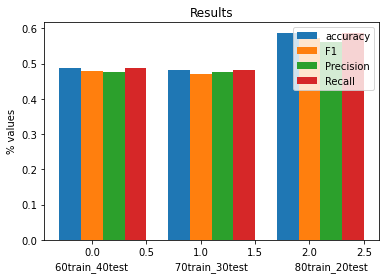

In [40]:
accuracy_List_knn = [knn_accuracy_60train_40test_tuned, knn_accuracy_70train_30test_tuned, knn_accuracy_80train_20test_tuned]
precision_List_knn = [knn_Precision_60train_40test_tuned, knn_Precision_70train_30test_tuned, knn_Precision_80train_20test_tuned]
recall_List_knn = [knn_Recall_60train_40test_tuned, knn_Recall_70train_30test_tuned, knn_Recall_80train_20test_tuned]
f1_List_knn = [knn_F1_60train_40test_tuned, knn_F1_70train_30test_tuned, knn_F1_80train_20test_tuned]

x_index = np.arange(3)
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, accuracy_List_knn, width=en, label = "accuracy")
plt.bar(x_index, f1_List_knn, width=en, label = "F1")
plt.bar(x_index+en, precision_List_knn, width=en, label = "Precision")
plt.bar(x_index+2*en, recall_List_knn, width=en, label = "Recall")

plt.legend()

plt.xlabel("60train_40test               70train_30test               80train_20test")
plt.ylabel("% values")
plt.title("Results")